In [1]:
import os
import sknw
import skimage
import skimage.filters

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

## Chargement des images

In [2]:
dataset_dir = "dataset/"
img_dir = dataset_dir + "images/"
manual_dir = dataset_dir + "manual1/"
mask_dir = dataset_dir + "mask/"

In [3]:
img_dataset = np.array([np.array(Image.open(img_dir + img).convert("L")) for img in sorted(os.listdir(img_dir))])

In [4]:
mask_dataset = np.array([np.array(Image.open(mask_dir + mask).convert("L")).astype(bool) for mask in sorted(os.listdir(mask_dir))])

In [5]:
manual_dataset = np.array([np.array(Image.open(manual_dir + manual)) / 255 for manual in sorted(os.listdir(manual_dir))])

In [6]:
nb_img = img_dataset.shape[0]
print(img_dataset.shape)

(45, 2336, 3504)


(2336, 3504)


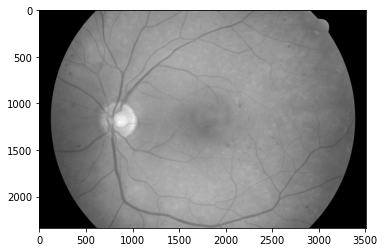

In [7]:
print(img_dataset[0].shape)

plt.imshow(img_dataset[0], cmap=plt.cm.gray)
plt.show()

(2336, 3504)


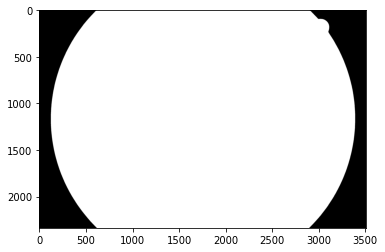

In [8]:
print(mask_dataset[0].shape)

plt.imshow(mask_dataset[0], cmap=plt.cm.gray)
plt.show()

(2336, 3504)


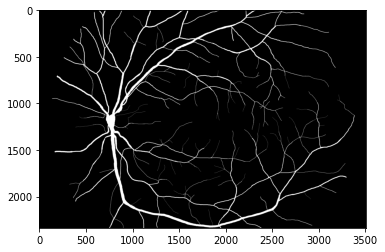

In [9]:
print(manual_dataset[0].shape)

plt.imshow(manual_dataset[0], cmap=plt.cm.gray)
plt.show()

## Segmentation de vaisseaux à l'aide d'un filtre de Frangis

Pour paramétrer le filtre utilisé, nous avons essayé plusieurs paramètres en observant les résultats visuellement et à l'aide d'un calcul de l'erreur moyenne sur les images générées.

In [302]:
nb_img = 6

In [ ]:
frangis = np.array([skimage.filters.frangi(img, sigmas=np.arange(1, 9, 1), alpha=.5, beta=.25, gamma=15) for img in img_dataset[:nb_img]])
print(frangis.shape)

In [ ]:
masked_frangis = np.array([np.where(mask_dataset[i], frangis[i], 0) for i in range(nb_img)])

In [ ]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(masked_frangis[0], figsize=(20, 12), verbose=False)

In [ ]:
thresholded_frangis = np.array([np.where(masked_frangis[i] > skimage.filters.threshold_li(masked_frangis[i]), 1, 0) for i in range(nb_img)])

In [ ]:
plt.imshow(thresholded_frangis[0], cmap=plt.cm.gray)
plt.show()

In [ ]:
errors = np.array([np.abs(thresholded_frangis[i] - manual_dataset[i]) for i in range(nb_img)])
mean_error = np.mean(errors)

In [ ]:
plt.imshow(errors[0], cmap=plt.cm.gray)
plt.show()

print(mean_error)

## Segmentation de lignes centrales

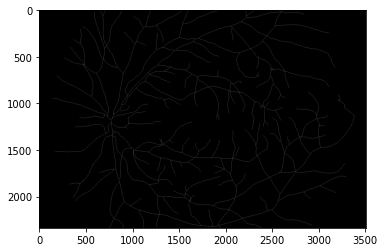

In [327]:
skels = np.array([skimage.morphology.skeletonize(img) for img in manual_dataset[:nb_img]])

plt.imshow(skels[0], cmap=plt.cm.gray)
plt.show()

In [328]:
graphs = [sknw.build_sknw(skel) for skel in skels]

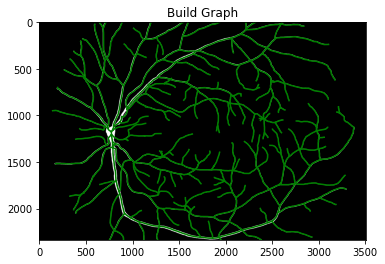

In [329]:
plt.imshow(manual_dataset[0], cmap=plt.cm.gray)

for (s, e) in graphs[0].edges():
    ps = graphs[0][s][e]['pts']
    plt.plot(ps[:, 1], ps[:, 0], 'green')
plt.title('Build Graph')
plt.show()

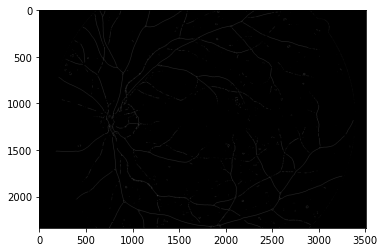

In [334]:
skels_frangis = np.array([skimage.morphology.skeletonize(img) for img in thresholded_frangis[:nb_img]])

plt.imshow(skels_frangis[0], cmap=plt.cm.gray)
plt.show()

In [335]:
graphs_frangis = [sknw.build_sknw(skel) for skel in skels_frangis]

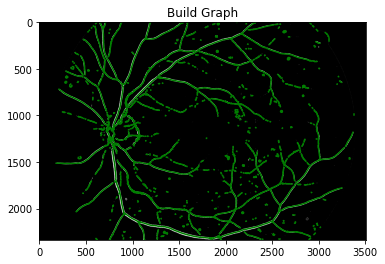

In [336]:
plt.imshow(thresholded_frangis[0], cmap=plt.cm.gray)

for (s, e) in graphs_frangis[0].edges():
    ps = graphs_frangis[0][s][e]['pts']
    plt.plot(ps[:, 1], ps[:, 0], 'green')

plt.title('Build Graph')
plt.show()